# 1. Context and Relevance
- Where is the data set coming from?
- How is the data sourced?
- How is the data collected?
- How often is the data updated?
- Are there any potential biases in the data?
- If there are, what are the risks and the implications?

In [7]:
# import library
import pandas as pd

# Relative path to read the CSV file from the "raw-data" folder
df = pd.read_csv(r"C:\Users\engel\OneDrive\Documents\Portfolio\Portfolio Projects\Winemag\winemag-data-130k-v2.csv")

# 2. Data Quality

In [8]:
# Check for missing values
df.isnull().sum()

id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# 3. Data Structure & Types

In [11]:
df.shape

(129971, 14)

In [13]:
df.dtypes

id                         int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [15]:
df.dtypes.value_counts()

object     11
int64       2
float64     1
Name: count, dtype: int64

# 4. Outliers

In [16]:
def find_extremes(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    return min_value, max_value

In [17]:
# Example usage
min_val, max_val = find_extremes(df, 'points')
print(f"Minimum: {min_val}, Maximum: {max_val}")

Minimum: 80, Maximum: 100


In [19]:
# Find the 5 smallest values
smallest_values = df['points'].nsmallest(5)
print("Smallest values:\n", smallest_values)

# Find the 5 largest values
largest_values = df["points"].nlargest(5)
print("Largest values:\n", largest_values)

Smallest values:
 344     80
3640    80
3641    80
4556    80
4557    80
Name: points, dtype: int64
Largest values:
 345      100
7335     100
36528    100
39286    100
42197    100
Name: points, dtype: int64


# 5. Data Distribution & Summary Statistics

In [20]:
def calculat_statistics(df, column):
    """
    Returns the mean, median, and mode for a specified column in the DataFrame

    Parameters:
        df (pd.DataFrame): the DataFrame containing the data.
        column (str): The column name to calculate statistics for.
    
    Returns:
        dict: A dictionary containing the mean, median, and mode of the column.
    """
    
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
    
    return{
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }

In [21]:
# Example usage
stats = calculat_statistics(df, 'points')
print(stats)

{'mean': np.float64(88.44713820775404), 'median': np.float64(88.0), 'mode': np.int64(88)}


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_seaborn(df, column, bins=10):
    """
    Creates a histogram for a specified column using seaborn.

    Parameters:
        df (pdDataFrame): The DataFrame containing the data.
        column (str): The column name to create a histogram for.
        bins (int): The number of bins in the histogram. Defaults to 10.
    """
    plt.figure(figsize=(10,6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black', kde_kws={'bw_adjust': 2})
    #sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

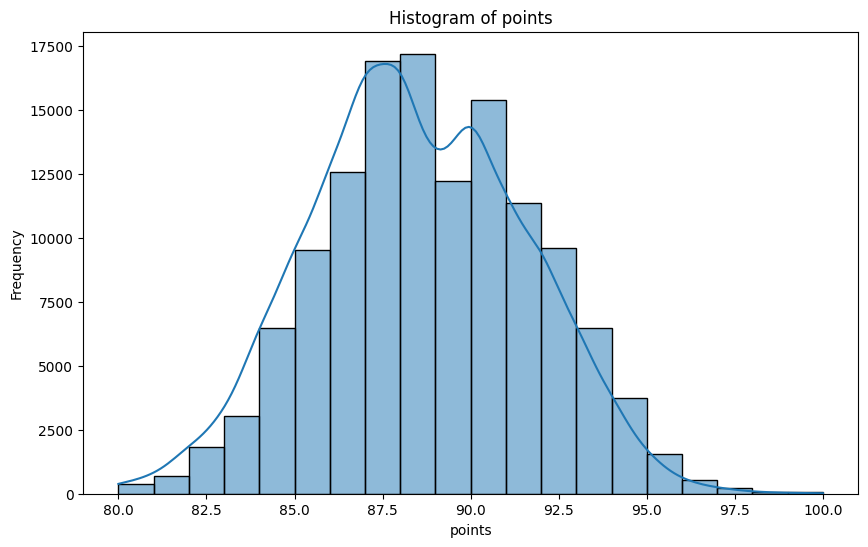

In [43]:
# Example usage
plot_histogram_seaborn(df, 'points', bins=20)

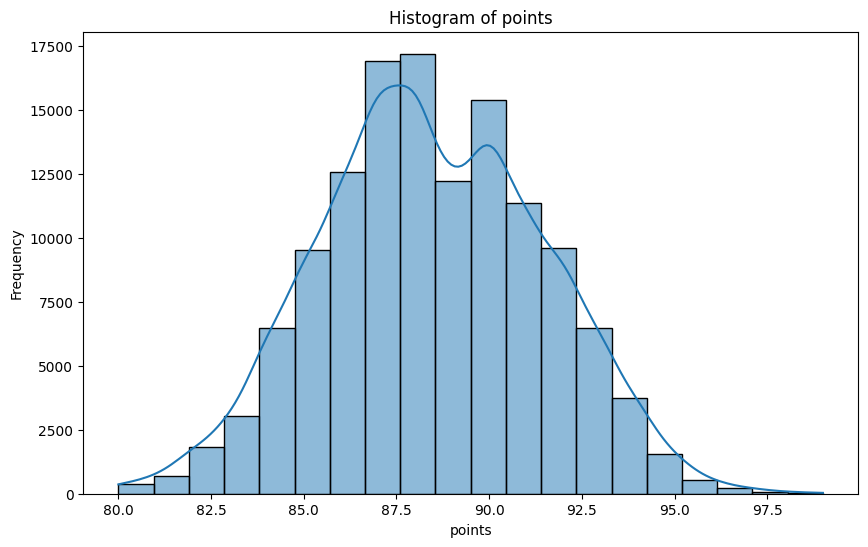

In [51]:
# Example usage
plot_histogram_seaborn(df[df.points != 100], 'points', bins=20)

<Axes: xlabel='points', ylabel='Count'>

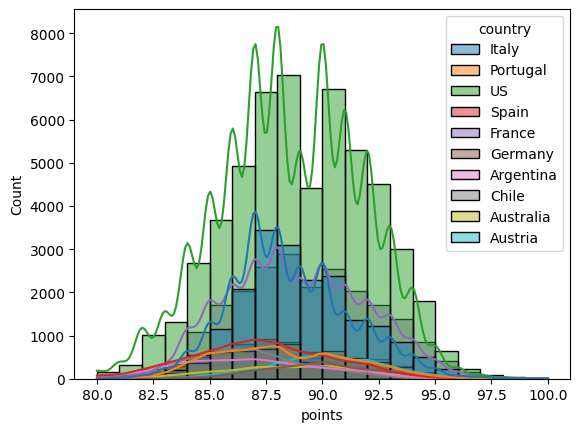

In [50]:
'''sns.histplot(df, x='points', hue='country', bins=100, kde=True)
plt.title('Histogram of Points by Country')
plt.show()

plt.figure(figsize=(12, 8))  # Increase figure size
sns.histplot(df, x='points', hue='country', bins=50, kde=True)

# Move legend outside
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Histogram of Points by Country')
plt.xlabel('Points')
plt.ylabel('Count')
plt.show()
'''

top_countries = df['country'].value_counts().nlargest(10).index  # Get top 10 countries by count
filtered_df = df[df['country'].isin(top_countries)]
sns.histplot(filtered_df, x='points', hue='country', bins=20, kde=True)


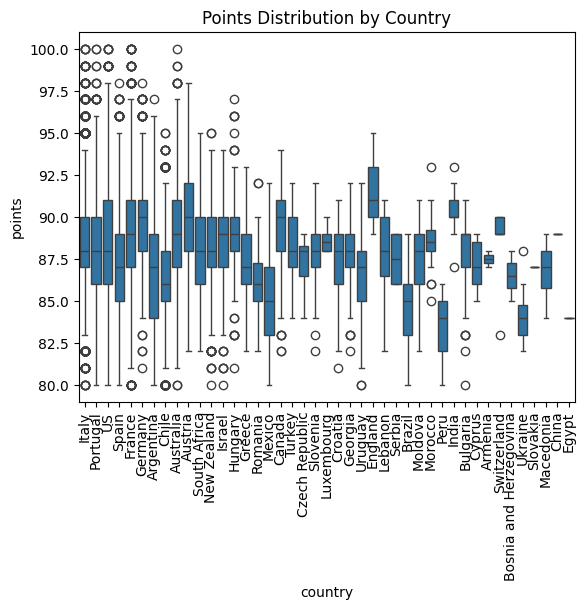

In [45]:
sns.boxplot(data=df, x='country', y='points')
plt.title('Points Distribution by Country')
plt.xticks(rotation=90)
plt.show()
